Lab 4: Working With 'Real' Data

Name: Wayne Lai,
Partner: Rebecca

This Lab took about 5 hours outside of class, so about 8 hours total.

Problem 1

In [43]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')

data = np.array(hf.get('data'))

In [131]:
# Part 1
#
# Plots were made of each column in terms of time. From the Solar Phases and Earth Longitude, the 
# periodic cycles can be seen clearly, as definitive peak can be spotted at a definitive time. The
# last column, particle count, is a distribution of data that is effected by errors and contamination.
# The plan is to use this distribution and find the model that represents the average. The model,
# then can be interpreted into probability distribution function. Finally, we can find the sigma, and
# adjust the value based on the need of the experiment. This sigma will determine the threshold of the
# data we know is background, inside, and data that is from a different source, outside. The outside
# data could be the bursts we are looking for assuming that the dataset is dominated by a good
# background.

# Part 2
#
# Though the background is not consistent across the dataset, as in a horizontal line, it does behave
# consistently in every period. This period is the orbital time where the satellite is going around the
# Earth, and we can see that the period is approximately 5400 seconds, just as expected. Within the
# period, the data starts at peak amplitude and decays exponentially to the minimum, at the end of the
# period. The peak may be when the satellite is most exposed to the Sun, as the Sun shoots off a lot of
# gamma rays. The decay would be the satellite drifting away from the Sun.

In [128]:
dataLength = len(data[3,:]);
print(dataLength)

25920001


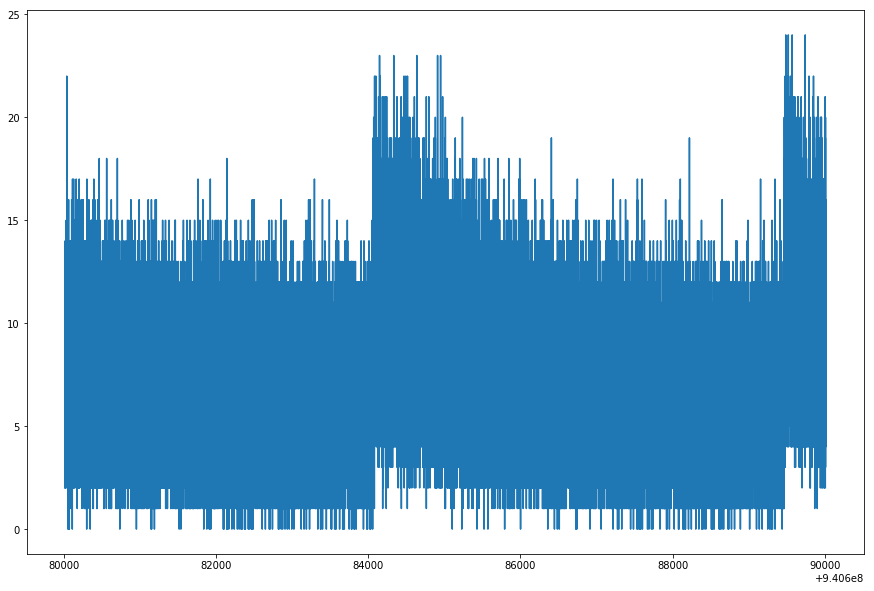

In [114]:
#plt.plot(data[0,0:xShort], data[3,0:xShort])
plt.plot(data[0,0:100000], data[3,0:100000])
plt.show()

In [93]:
#print(np.argmin(data[3,:]))
#np.where(data[3,:] > 24)
int(len(data[3,:]) / 5400)

4800

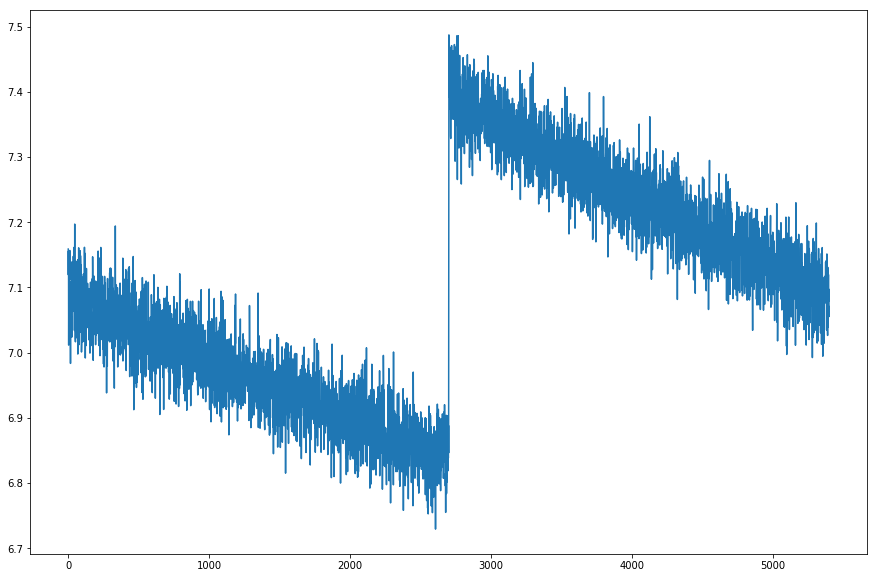

In [115]:
# Part 3

# take array that represent data of one period
# take the next period array and add to it, initiate the count
# go through all the periods in the data and divide by count
# should get one period that is average of all data

count = 0;
period = 5400;
dataMean = np.zeros(period);
totalLen = len(data[3,:]);
numInterval = int(totalLen / period)

for x in range(numInterval):
    start = x * period;
    stop = start + period;
    dataMean = dataMean + data[3,start:stop];
    count = count + 1;
    
aveData = dataMean / count;
plt.plot(aveData)
plt.show()

In [106]:
# to shift the data
# find index of maximum
# the period minus that index is the amount to shift

shift = period - np.argmax(aveData)
print(shift)

2643


In [120]:
count = 0;
period = 5400;
dataMean = np.transpose(np.zeros(period));
totalLen = len(data[3,:]);
numInterval = int(totalLen / period)

for x in range(numInterval - 1):
    start = (x * period) + shift;
    stop = (start + period) + shift;
    dataMean = dataMean + data[3,start:stop];
    count = count + 1;
    
aveData = dataMean / count;
plt.plot(aveData)
plt.show()

ValueError: operands could not be broadcast together with shapes (5400,) (8043,) 

Problem 2

<KeysViewHDF5 ['image1', 'imagestack']>
(200, 200, 10)
(200, 200)


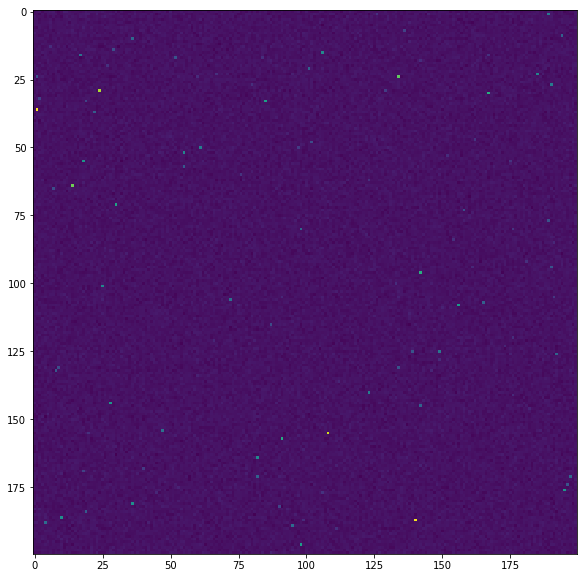

In [62]:
# Part 1
#
# Download the image

hf2 = h5py.File('images.h5', 'r')

data2 = np.array(hf2.get('imagestack'))
data3 = np.array(hf2.get('image1'))

print(hf2.keys())
print(np.shape(data2)) # dimensions of 'imagestack'
print(np.shape(data3)) # dimensions of 'image1'

plt.imshow(data2[:,:,0])
plt.show()

In [117]:
np.shape(data2)

(200, 200, 10)

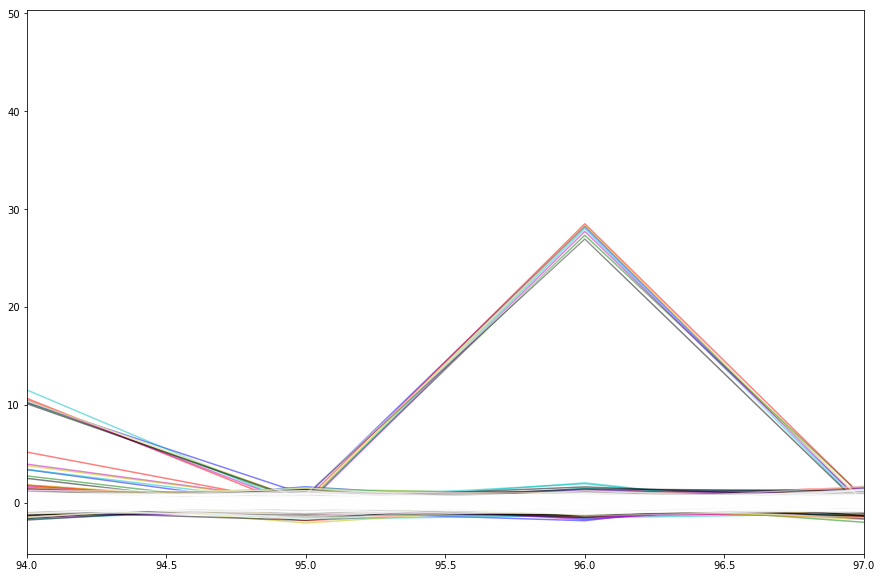

In [116]:
#plt.imshow(data2[:,:,9])
plt.plot(data2[:,:,0], color = 'b', alpha = 0.5)
plt.plot(data2[:,:,1], color = 'g', alpha = 0.5)
plt.plot(data2[:,:,2], color = 'r', alpha = 0.5)
plt.plot(data2[:,:,3], color = 'c', alpha = 0.5)
plt.plot(data2[:,:,4], color = 'm', alpha = 0.5)
plt.plot(data2[:,:,5], color = 'y', alpha = 0.5)
plt.plot(data2[:,:,6], color = 'k', alpha = 0.5)
plt.plot(data2[:,:,7], color = 'w', alpha = 0.5)
#plt.plot(data3, color = 'g', alpha = 0.5)

plt.xlim(94,97)
plt.show()

In [ ]:
# Part 2
#
# Each image is presented as three arrays, array with 10 values I assume is some kind of index. A graph
# can be made using the other pair of arrays. Visually, after stacking the graphs for most of the images,
# we can see a band at around y = 0 for all x, it seems to stay linear through all 10 images, as a
# result, we can say that the background will not change through the time interval we are dealing with,
# it is not time dependent. With the same graph, the peaks are additional signals received outside of
# background. By zooming in some of these peaks, they consistently peak at the same value x, while the
# y value varies a little bit more. Perhaps the spatial consistency from this visual means that the slight
# wobble is up and down, while objects don't move left and right.
#

# Part 3
#
# As for transient objects, this is something that will show up only in very few images. On the probability
# density function, these objects would have a very low value attached as the percentage of them existing 
# is very small, near zero. On a visual curve, these are located on the tail, a few standard deviations out.
